<ipython-input-2-2091077245>:5: ParserWarning: Skipping line 12735: unexpected end of data

  df=pd.read_csv('movie.csv', engine='python', on_bad_lines='warn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12733 entries, 0 to 12732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12733 non-null  object
 1   label   12733 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 199.1+ KB
label
0    6382
1    6324
Name: count, dtype: int64
[0 1]


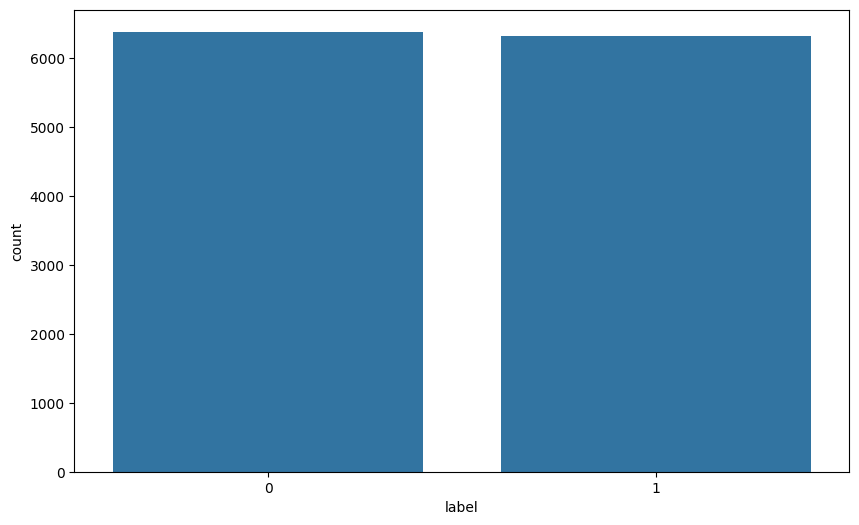

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Logistic Regression:
Accuracy: 0.8745082612116444
F1 Score: 0.8750489620054838
ROC AUC: 0.8746620481722587
Confusion Matrix:
 [[1106  179]
 [ 140 1117]]

Naive Bayes:
Accuracy: 0.8379228953579858
F1 Score: 0.8340048348106366
ROC AUC: 0.8377645496503626
Confusion Matrix:
 [[1095  190]
 [ 222 1035]]

SVM:
Accuracy: 0.8749016522423289
F1 Score: 0.8760717069368668
ROC AUC: 0.8751118251410777
Confusion Matrix:
 [[1100  185]
 [ 133 1124]]

Random Forest:
Accuracy: 0.8316286388670339
F1 Score: 0.8279742765273312
ROC AUC: 0.8314955316376154
Confusion Matrix:
 [[1084  201]
 [ 227 1030]]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('movie.csv', engine='python', on_bad_lines='warn')
df.head()
df.tail()
df.info()
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.columns
df.shape
print(df['label'].value_counts())
print(df['label'].unique())

plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df)
plt.show()
import nltk
nltk.download('stopwords')
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
def preprocess(text):
    tokens = clean_text(text).split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess)
df.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("ROC AUC:", roc_auc_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Logistic Regression:")
evaluate_model(LogisticRegression(), X_train_vec, X_test_vec, y_train, y_test)

print("\nNaive Bayes:")
evaluate_model(BernoulliNB(), X_train_vec, X_test_vec, y_train, y_test)

print("\nSVM:")
evaluate_model(SVC(), X_train_vec, X_test_vec, y_train, y_test)

print("\nRandom Forest:")
evaluate_model(RandomForestClassifier(), X_train_vec, X_test_vec, y_train, y_test)